# Heart Disease Neural Network Classifier 👩‍⚕️🩺🧪🩸

In this notebook I have attempted to get to grips with using a neural network for a simple yes or no classification problem. This is mainly based on this <a href="https://github.com/pyladies-bcn/your_first_neural_network"> example</a> from pyladies-bcn, however I have made some edits as I am working with a more up to date version of TensorFlow and a different dataset.

In [1]:
# Importing TensorFlow and checking version 
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.1.0


In [2]:
# Importing TensorFlow model, scikit learn and other necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

### Importing and inspecting the data 

In [3]:
# Importing the dataset and inspecting the shape
heart_ds = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
heart_ds.shape

(1190, 12)

In [4]:
# Taking a look at an overview of our column values 
heart_ds.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
# Taking a look at our columns. Fortunately we have no missing values 
heart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


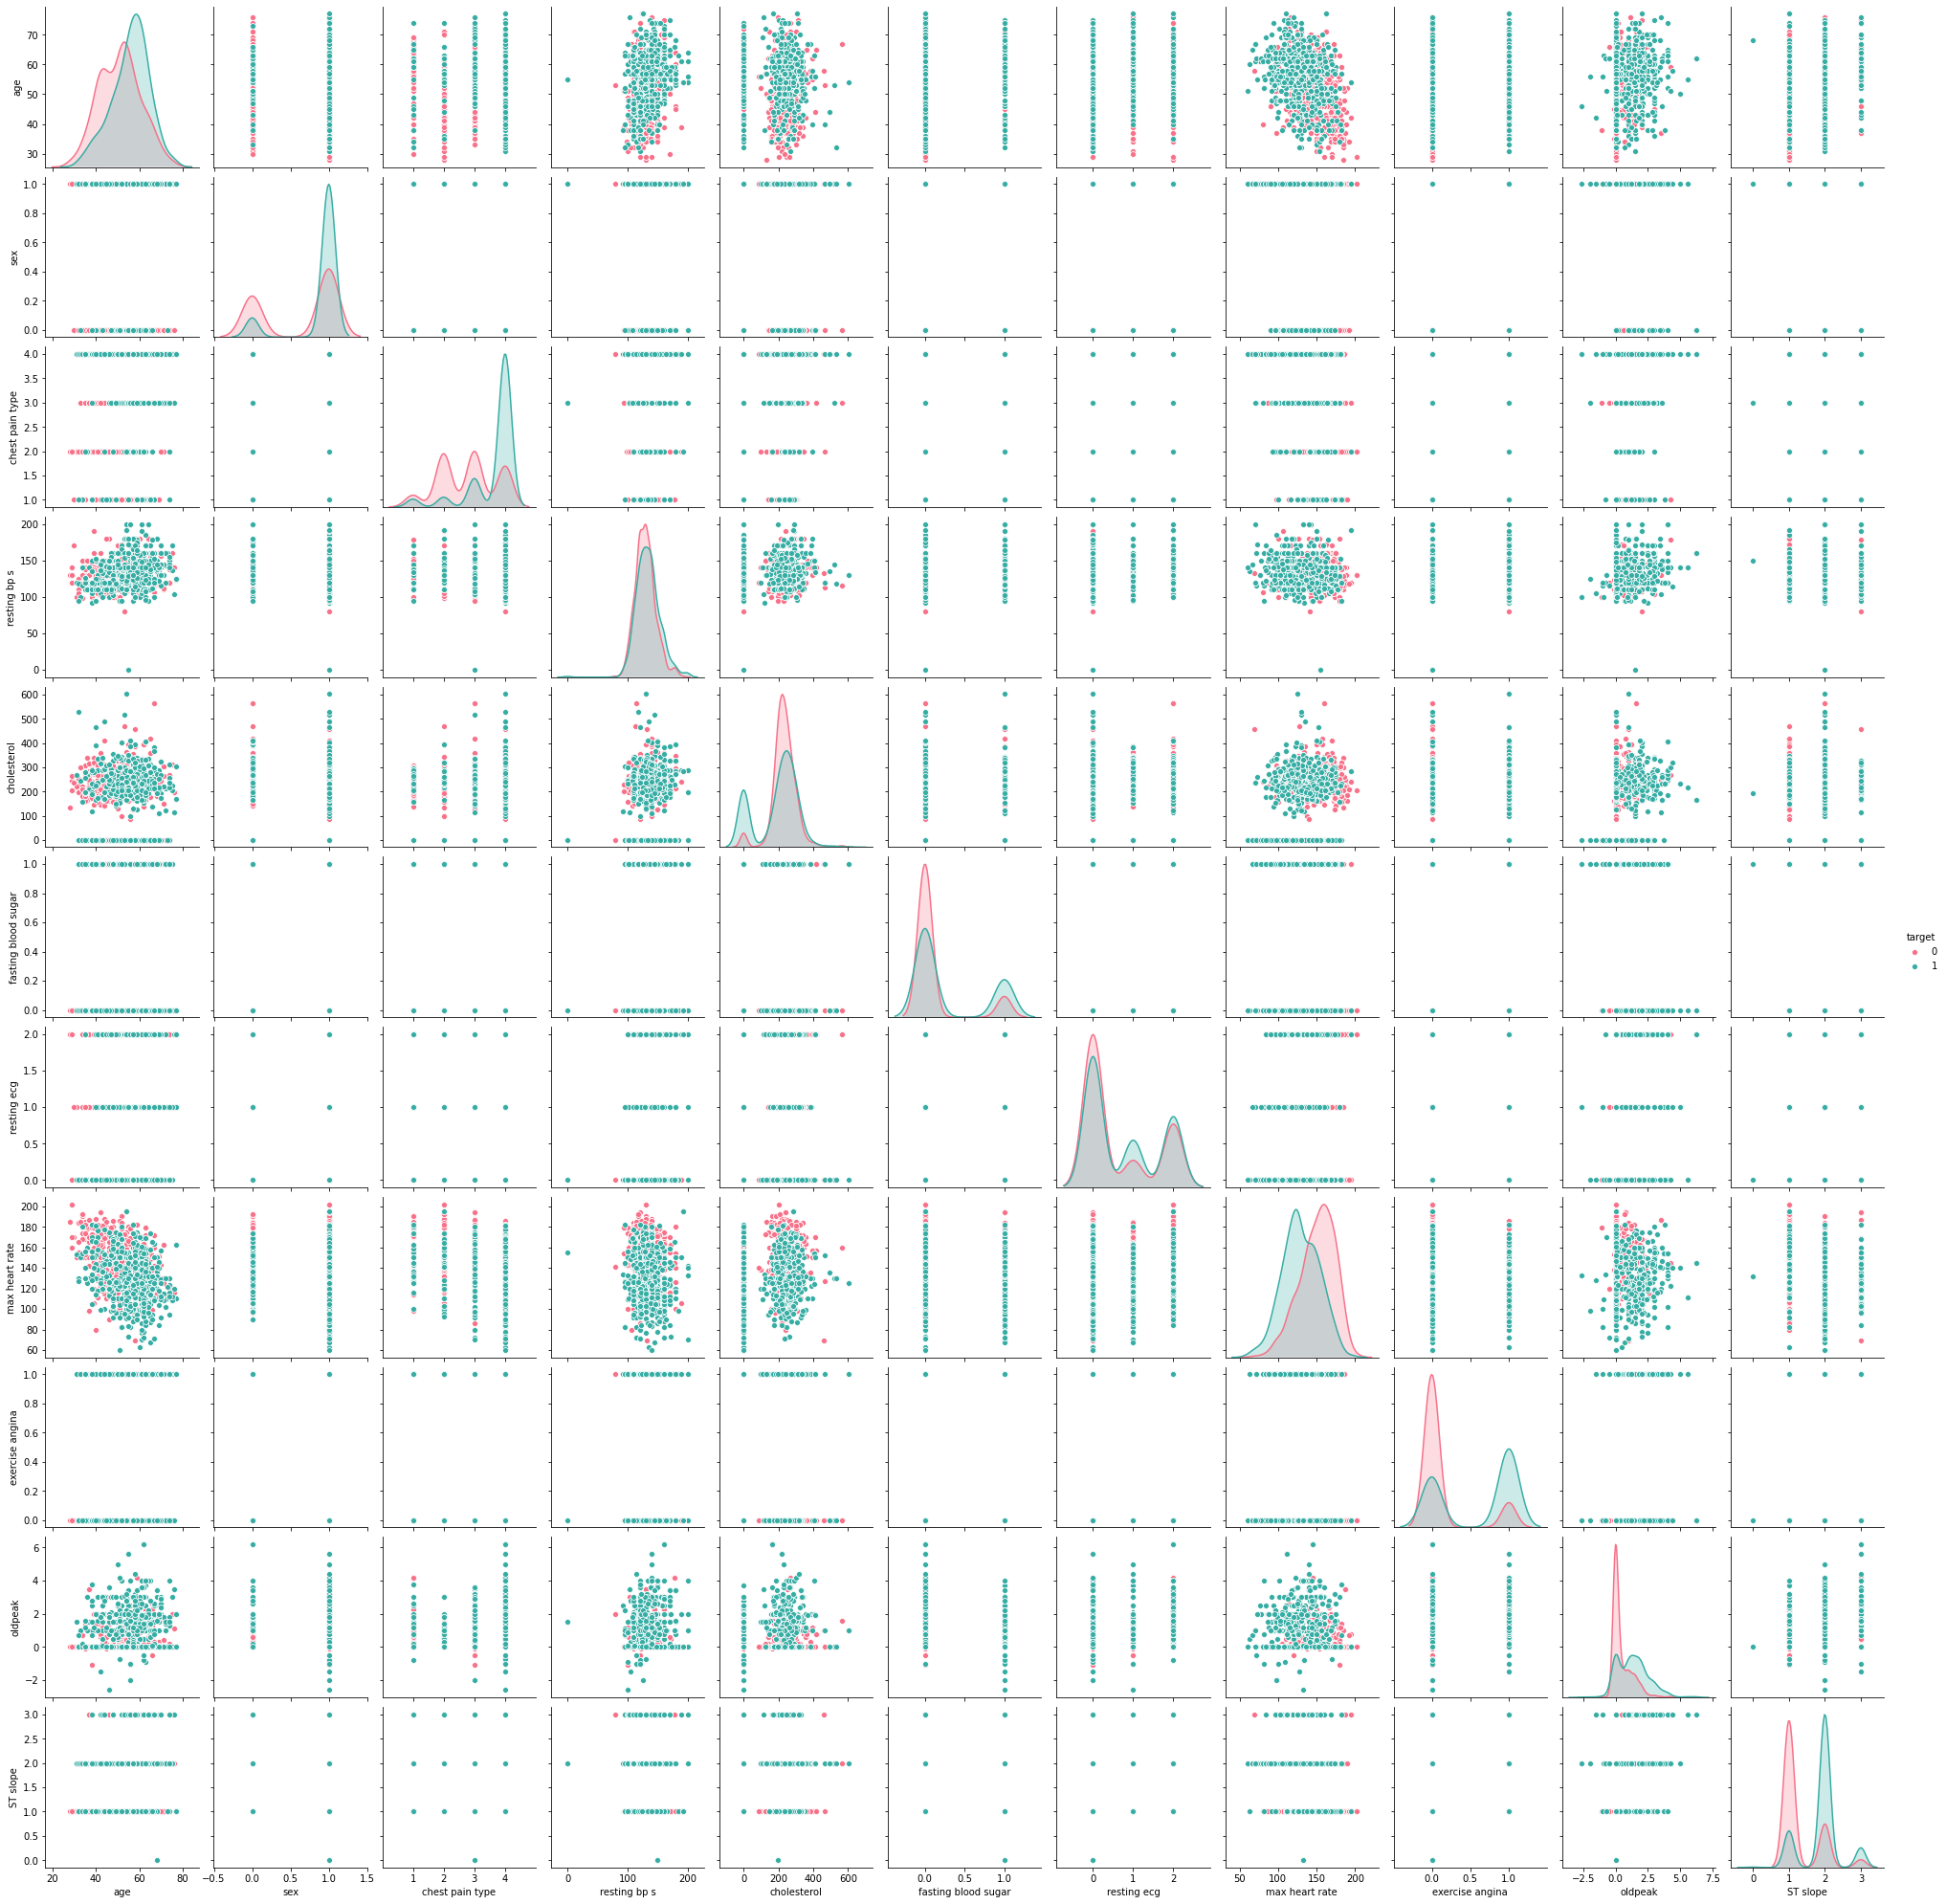

In [6]:
# Inspecting all the column values visually 
ax = sns.pairplot(heart_ds, hue='target', palette="husl")

We can see that, although there are no missing values, there are zero values for cholesterol and resting heart rate which do not make sense. So we will replace these with the average value for that column.

In [22]:
# Replacing cholesterol zero values 
chol_avg = int(round(np.median(heart_ds.cholesterol.unique())))
heart_ds.cholesterol.replace(to_replace=0, value=chol_avg, inplace=True)

In [26]:
# Replacing resting bp s zero values
rbps_avg = int(round(np.median(heart_ds['resting bp s'].mean())))
heart_ds['resting bp s'].replace(to_replace=0, value=rbps_avg, inplace=True)

### Split the data

In [27]:
# Train/test split with random state 42 
features = heart_ds.columns[:-1]

X = heart_ds[features]
y = heart_ds['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original dataset shape: ", X.shape)
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Original dataset shape:  (1190, 11)
Training set shape:  (952, 11)
Testing set shape:  (238, 11)


In [28]:
# Making sure the column titles aren't included as values
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

### Building the model

In [29]:
# Setting the number of epochs and batch size 
NB_EPOCHS = 600
BATCH_SIZE = 16

# Creating an instance of the model
model = Sequential()

# Adding the 1st layer: input_dim=11, 12 nodes, RELU
model.add(Dense(12, input_dim=11, activation='relu'))
# Adding the 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# Adding the output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

# Compiling the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
              optimizer='adam',
              metrics=['accuracy'])

# Establishing the checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint]

# Visualising the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [30]:
# training the model, storing the results as history for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=1)

Train on 952 samples, validate on 238 samples
Epoch 1/600
944/952 [============================>.] - ETA: 0s - loss: 5.2156 - accuracy: 0.3994
Epoch 00001: val_accuracy improved from -inf to 0.39076, saving model to pima-weights.best.hdf5
952/952 [==============================] - 3s 4ms/sample - loss: 5.2226 - accuracy: 0.3992 - val_loss: 4.0889 - val_accuracy: 0.3908
Epoch 2/600
864/952 [==========================>...] - ETA: 0s - loss: 3.1038 - accuracy: 0.4028
Epoch 00002: val_accuracy did not improve from 0.39076
952/952 [==============================] - 0s 257us/sample - loss: 2.9911 - accuracy: 0.4065 - val_loss: 2.0512 - val_accuracy: 0.3866
Epoch 3/600
944/952 [============================>.] - ETA: 0s - loss: 1.3344 - accuracy: 0.4778
Epoch 00003: val_accuracy improved from 0.39076 to 0.45378, saving model to pima-weights.best.hdf5
952/952 [==============================] - 0s 280us/sample - loss: 1.3307 - accuracy: 0.4790 - val_loss: 0.9547 - val_accuracy: 0.4538
Epoch 4/60

Epoch 28/600
928/952 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.7866
Epoch 00028: val_accuracy did not improve from 0.82773
952/952 [==============================] - 0s 307us/sample - loss: 0.4619 - accuracy: 0.7868 - val_loss: 0.5989 - val_accuracy: 0.7185
Epoch 29/600
912/952 [===========================>..] - ETA: 0s - loss: 0.5083 - accuracy: 0.7664
Epoch 00029: val_accuracy improved from 0.82773 to 0.83193, saving model to pima-weights.best.hdf5
952/952 [==============================] - 0s 368us/sample - loss: 0.5003 - accuracy: 0.7721 - val_loss: 0.4279 - val_accuracy: 0.8319
Epoch 30/600
848/952 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.7700
Epoch 00030: val_accuracy did not improve from 0.83193
952/952 [==============================] - 0s 320us/sample - loss: 0.4731 - accuracy: 0.7794 - val_loss: 0.5931 - val_accuracy: 0.7269
Epoch 31/600
816/952 [========================>.....] - ETA: 0s - loss: 0.4532 - accuracy: 0

784/952 [=======================>......] - ETA: 0s - loss: 0.4178 - accuracy: 0.8036
Epoch 00056: val_accuracy did not improve from 0.84034
952/952 [==============================] - 0s 175us/sample - loss: 0.4142 - accuracy: 0.8099 - val_loss: 0.4078 - val_accuracy: 0.8319
Epoch 57/600
720/952 [=====================>........] - ETA: 0s - loss: 0.4592 - accuracy: 0.7903
Epoch 00057: val_accuracy did not improve from 0.84034
952/952 [==============================] - 0s 192us/sample - loss: 0.4600 - accuracy: 0.7868 - val_loss: 0.4376 - val_accuracy: 0.8109
Epoch 58/600
832/952 [=========================>....] - ETA: 0s - loss: 0.4278 - accuracy: 0.8089
Epoch 00058: val_accuracy did not improve from 0.84034
952/952 [==============================] - 0s 176us/sample - loss: 0.4314 - accuracy: 0.8067 - val_loss: 0.3943 - val_accuracy: 0.8235
Epoch 59/600
768/952 [=======================>......] - ETA: 0s - loss: 0.4290 - accuracy: 0.8021
Epoch 00059: val_accuracy did not improve from 0.84

896/952 [===========================>..] - ETA: 0s - loss: 0.4305 - accuracy: 0.7935
Epoch 00084: val_accuracy did not improve from 0.84454
952/952 [==============================] - 0s 290us/sample - loss: 0.4367 - accuracy: 0.7931 - val_loss: 0.4439 - val_accuracy: 0.7983
Epoch 85/600
896/952 [===========================>..] - ETA: 0s - loss: 0.4501 - accuracy: 0.8025
Epoch 00085: val_accuracy did not improve from 0.84454
952/952 [==============================] - 0s 312us/sample - loss: 0.4464 - accuracy: 0.8015 - val_loss: 0.4086 - val_accuracy: 0.8403
Epoch 86/600
880/952 [==========================>...] - ETA: 0s - loss: 0.4062 - accuracy: 0.8239
Epoch 00086: val_accuracy did not improve from 0.84454
952/952 [==============================] - 0s 312us/sample - loss: 0.4166 - accuracy: 0.8193 - val_loss: 0.3991 - val_accuracy: 0.8403
Epoch 87/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4097 - accuracy: 0.8090
Epoch 00087: val_accuracy did not improve from 0.84

832/952 [=========================>....] - ETA: 0s - loss: 0.4207 - accuracy: 0.8137
Epoch 00112: val_accuracy did not improve from 0.84874
952/952 [==============================] - 0s 174us/sample - loss: 0.4165 - accuracy: 0.8172 - val_loss: 0.3939 - val_accuracy: 0.8445
Epoch 113/600
784/952 [=======================>......] - ETA: 0s - loss: 0.4040 - accuracy: 0.8291
Epoch 00113: val_accuracy did not improve from 0.84874
952/952 [==============================] - 0s 175us/sample - loss: 0.4245 - accuracy: 0.8172 - val_loss: 0.3939 - val_accuracy: 0.8445
Epoch 114/600
848/952 [=========================>....] - ETA: 0s - loss: 0.4208 - accuracy: 0.8113
Epoch 00114: val_accuracy did not improve from 0.84874
952/952 [==============================] - 0s 177us/sample - loss: 0.4157 - accuracy: 0.8151 - val_loss: 0.4285 - val_accuracy: 0.8067
Epoch 115/600
832/952 [=========================>....] - ETA: 0s - loss: 0.4194 - accuracy: 0.8185
Epoch 00115: val_accuracy did not improve from 0

880/952 [==========================>...] - ETA: 0s - loss: 0.4250 - accuracy: 0.8125
Epoch 00140: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 241us/sample - loss: 0.4215 - accuracy: 0.8162 - val_loss: 0.4072 - val_accuracy: 0.8361
Epoch 141/600
912/952 [===========================>..] - ETA: 0s - loss: 0.4322 - accuracy: 0.7950
Epoch 00141: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 235us/sample - loss: 0.4367 - accuracy: 0.7910 - val_loss: 0.4042 - val_accuracy: 0.8361
Epoch 142/600
672/952 [====================>.........] - ETA: 0s - loss: 0.4471 - accuracy: 0.7842
Epoch 00142: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 186us/sample - loss: 0.4275 - accuracy: 0.8036 - val_loss: 0.3931 - val_accuracy: 0.8487
Epoch 143/600
752/952 [======================>.......] - ETA: 0s - loss: 0.4139 - accuracy: 0.8298
Epoch 00143: val_accuracy did not improve from 0

Epoch 169/600
912/952 [===========================>..] - ETA: 0s - loss: 0.4261 - accuracy: 0.7982
Epoch 00169: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 313us/sample - loss: 0.4280 - accuracy: 0.7973 - val_loss: 0.3922 - val_accuracy: 0.8277
Epoch 170/600
912/952 [===========================>..] - ETA: 0s - loss: 0.4216 - accuracy: 0.8169
Epoch 00170: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 333us/sample - loss: 0.4151 - accuracy: 0.8183 - val_loss: 0.4383 - val_accuracy: 0.8025
Epoch 171/600
816/952 [========================>.....] - ETA: 0s - loss: 0.4218 - accuracy: 0.8125
Epoch 00171: val_accuracy did not improve from 0.85294
952/952 [==============================] - 0s 332us/sample - loss: 0.4293 - accuracy: 0.8078 - val_loss: 0.5509 - val_accuracy: 0.7395
Epoch 172/600
800/952 [========================>.....] - ETA: 0s - loss: 0.4594 - accuracy: 0.7912
Epoch 00172: val_accuracy improved

832/952 [=========================>....] - ETA: 0s - loss: 0.4264 - accuracy: 0.8041
Epoch 00197: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 192us/sample - loss: 0.4253 - accuracy: 0.7983 - val_loss: 0.4594 - val_accuracy: 0.7983
Epoch 198/600
896/952 [===========================>..] - ETA: 0s - loss: 0.4245 - accuracy: 0.8103
Epoch 00198: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 227us/sample - loss: 0.4227 - accuracy: 0.8067 - val_loss: 0.3953 - val_accuracy: 0.8487
Epoch 199/600
672/952 [====================>.........] - ETA: 0s - loss: 0.4211 - accuracy: 0.8110
Epoch 00199: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 228us/sample - loss: 0.4129 - accuracy: 0.8120 - val_loss: 0.4582 - val_accuracy: 0.7983
Epoch 200/600
896/952 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8047
Epoch 00200: val_accuracy did not improve from 0

Epoch 226/600
672/952 [====================>.........] - ETA: 0s - loss: 0.4668 - accuracy: 0.7917
Epoch 00226: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 204us/sample - loss: 0.4439 - accuracy: 0.7983 - val_loss: 0.5168 - val_accuracy: 0.7563
Epoch 227/600
768/952 [=======================>......] - ETA: 0s - loss: 0.4302 - accuracy: 0.8151
Epoch 00227: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 209us/sample - loss: 0.4260 - accuracy: 0.8214 - val_loss: 0.3850 - val_accuracy: 0.8403
Epoch 228/600
816/952 [========================>.....] - ETA: 0s - loss: 0.4179 - accuracy: 0.8100
Epoch 00228: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 193us/sample - loss: 0.4331 - accuracy: 0.7994 - val_loss: 0.3841 - val_accuracy: 0.8445
Epoch 229/600
816/952 [========================>.....] - ETA: 0s - loss: 0.3999 - accuracy: 0.8272
Epoch 00229: val_accuracy did not 

Epoch 255/600
944/952 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.7913
Epoch 00255: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 229us/sample - loss: 0.4213 - accuracy: 0.7920 - val_loss: 0.5257 - val_accuracy: 0.7521
Epoch 256/600
752/952 [======================>.......] - ETA: 0s - loss: 0.4183 - accuracy: 0.8072
Epoch 00256: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 244us/sample - loss: 0.4297 - accuracy: 0.8067 - val_loss: 0.3840 - val_accuracy: 0.8403
Epoch 257/600
800/952 [========================>.....] - ETA: 0s - loss: 0.4050 - accuracy: 0.8288
Epoch 00257: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 175us/sample - loss: 0.4085 - accuracy: 0.8225 - val_loss: 0.3928 - val_accuracy: 0.8571
Epoch 258/600
848/952 [=========================>....] - ETA: 0s - loss: 0.4146 - accuracy: 0.8184
Epoch 00258: val_accuracy did not 

Epoch 00283: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 323us/sample - loss: 0.4174 - accuracy: 0.8099 - val_loss: 0.3832 - val_accuracy: 0.8487
Epoch 284/600
832/952 [=========================>....] - ETA: 0s - loss: 0.4371 - accuracy: 0.7921
Epoch 00284: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 325us/sample - loss: 0.4316 - accuracy: 0.7973 - val_loss: 0.3882 - val_accuracy: 0.8319
Epoch 285/600
784/952 [=======================>......] - ETA: 0s - loss: 0.4115 - accuracy: 0.8151
Epoch 00285: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 308us/sample - loss: 0.4063 - accuracy: 0.8204 - val_loss: 0.3846 - val_accuracy: 0.8403
Epoch 286/600
912/952 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8235
Epoch 00286: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 228us/sample - loss: 0.4113 - ac

Epoch 312/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4094 - accuracy: 0.8009
Epoch 00312: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 520us/sample - loss: 0.4089 - accuracy: 0.8067 - val_loss: 0.3937 - val_accuracy: 0.8277
Epoch 313/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4128 - accuracy: 0.8102
Epoch 00313: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 559us/sample - loss: 0.4135 - accuracy: 0.8109 - val_loss: 0.4271 - val_accuracy: 0.8025
Epoch 314/600
832/952 [=========================>....] - ETA: 0s - loss: 0.4237 - accuracy: 0.8161
Epoch 00314: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 322us/sample - loss: 0.4114 - accuracy: 0.8235 - val_loss: 0.3841 - val_accuracy: 0.8445
Epoch 315/600
944/952 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8199
Epoch 00315: val_accuracy did not 

848/952 [=========================>....] - ETA: 0s - loss: 0.3970 - accuracy: 0.8255
Epoch 00340: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 654us/sample - loss: 0.4039 - accuracy: 0.8193 - val_loss: 0.4017 - val_accuracy: 0.8445
Epoch 341/600
896/952 [===========================>..] - ETA: 0s - loss: 0.4221 - accuracy: 0.8147
Epoch 00341: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 688us/sample - loss: 0.4274 - accuracy: 0.8130 - val_loss: 0.3945 - val_accuracy: 0.8277
Epoch 342/600
752/952 [======================>.......] - ETA: 0s - loss: 0.4154 - accuracy: 0.8218
Epoch 00342: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 286us/sample - loss: 0.4122 - accuracy: 0.8214 - val_loss: 0.4409 - val_accuracy: 0.8067
Epoch 343/600
848/952 [=========================>....] - ETA: 0s - loss: 0.4296 - accuracy: 0.8054
Epoch 00343: val_accuracy did not improve from 0

928/952 [============================>.] - ETA: 0s - loss: 0.4507 - accuracy: 0.7909
Epoch 00368: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 282us/sample - loss: 0.4507 - accuracy: 0.7889 - val_loss: 0.3882 - val_accuracy: 0.8403
Epoch 369/600
592/952 [=================>............] - ETA: 0s - loss: 0.3905 - accuracy: 0.8395
Epoch 00369: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 201us/sample - loss: 0.4045 - accuracy: 0.8330 - val_loss: 0.3905 - val_accuracy: 0.8613
Epoch 370/600
848/952 [=========================>....] - ETA: 0s - loss: 0.4014 - accuracy: 0.8231
Epoch 00370: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 315us/sample - loss: 0.4089 - accuracy: 0.8225 - val_loss: 0.3907 - val_accuracy: 0.8613
Epoch 371/600
912/952 [===========================>..] - ETA: 0s - loss: 0.3973 - accuracy: 0.8191
Epoch 00371: val_accuracy did not improve from 0

944/952 [============================>.] - ETA: 0s - loss: 0.4033 - accuracy: 0.8178
Epoch 00396: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 555us/sample - loss: 0.4047 - accuracy: 0.8162 - val_loss: 0.3842 - val_accuracy: 0.8403
Epoch 397/600
880/952 [==========================>...] - ETA: 0s - loss: 0.4222 - accuracy: 0.8091
Epoch 00397: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 469us/sample - loss: 0.4185 - accuracy: 0.8078 - val_loss: 0.3842 - val_accuracy: 0.8403
Epoch 398/600
912/952 [===========================>..] - ETA: 0s - loss: 0.4235 - accuracy: 0.8092
Epoch 00398: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 341us/sample - loss: 0.4204 - accuracy: 0.8099 - val_loss: 0.3884 - val_accuracy: 0.8403
Epoch 399/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4201 - accuracy: 0.8113 ETA: 0s - loss: 0.3841 - ac
Epoch 00399: val_acc

816/952 [========================>.....] - ETA: 0s - loss: 0.4081 - accuracy: 0.8199
Epoch 00424: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 1ms/sample - loss: 0.4083 - accuracy: 0.8235 - val_loss: 0.3931 - val_accuracy: 0.8319
Epoch 425/600
832/952 [=========================>....] - ETA: 0s - loss: 0.4196 - accuracy: 0.8209
Epoch 00425: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 379us/sample - loss: 0.4139 - accuracy: 0.8225 - val_loss: 0.4020 - val_accuracy: 0.8445
Epoch 426/600
800/952 [========================>.....] - ETA: 0s - loss: 0.4163 - accuracy: 0.8062
Epoch 00426: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 228us/sample - loss: 0.4086 - accuracy: 0.8141 - val_loss: 0.3927 - val_accuracy: 0.8529
Epoch 427/600
560/952 [================>.............] - ETA: 0s - loss: 0.3916 - accuracy: 0.8268
Epoch 00427: val_accuracy did not improve from 0.8

Epoch 453/600
800/952 [========================>.....] - ETA: 0s - loss: 0.4106 - accuracy: 0.8263
Epoch 00453: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 258us/sample - loss: 0.4029 - accuracy: 0.8309 - val_loss: 0.3895 - val_accuracy: 0.8487
Epoch 454/600
816/952 [========================>.....] - ETA: 0s - loss: 0.4590 - accuracy: 0.7831
Epoch 00454: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 266us/sample - loss: 0.4525 - accuracy: 0.7868 - val_loss: 0.4339 - val_accuracy: 0.8109
Epoch 455/600
944/952 [============================>.] - ETA: 0s - loss: 0.4149 - accuracy: 0.8189
Epoch 00455: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 753us/sample - loss: 0.4136 - accuracy: 0.8193 - val_loss: 0.3914 - val_accuracy: 0.8487
Epoch 456/600
784/952 [=======================>......] - ETA: 0s - loss: 0.4100 - accuracy: 0.8112
Epoch 00456: val_accuracy did not 

784/952 [=======================>......] - ETA: 0s - loss: 0.4124 - accuracy: 0.8112
Epoch 00481: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 333us/sample - loss: 0.4053 - accuracy: 0.8151 - val_loss: 0.3937 - val_accuracy: 0.8403
Epoch 482/600
880/952 [==========================>...] - ETA: 0s - loss: 0.3998 - accuracy: 0.8193
Epoch 00482: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 308us/sample - loss: 0.3976 - accuracy: 0.8214 - val_loss: 0.3949 - val_accuracy: 0.8529
Epoch 483/600
928/952 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8211
Epoch 00483: val_accuracy did not improve from 0.86134
952/952 [==============================] - 1s 790us/sample - loss: 0.4019 - accuracy: 0.8225 - val_loss: 0.3950 - val_accuracy: 0.8445
Epoch 484/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4240 - accuracy: 0.8032
Epoch 00484: val_accuracy did not improve from 0

816/952 [========================>.....] - ETA: 0s - loss: 0.4127 - accuracy: 0.8064
Epoch 00509: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 248us/sample - loss: 0.3967 - accuracy: 0.8214 - val_loss: 0.3947 - val_accuracy: 0.8529
Epoch 510/600
608/952 [==================>...........] - ETA: 0s - loss: 0.4145 - accuracy: 0.8273
Epoch 00510: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 206us/sample - loss: 0.3950 - accuracy: 0.8277 - val_loss: 0.4379 - val_accuracy: 0.8193
Epoch 511/600
720/952 [=====================>........] - ETA: 0s - loss: 0.4097 - accuracy: 0.8056
Epoch 00511: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 192us/sample - loss: 0.4031 - accuracy: 0.8078 - val_loss: 0.4053 - val_accuracy: 0.8319
Epoch 512/600
736/952 [======================>.......] - ETA: 0s - loss: 0.4067 - accuracy: 0.8098
Epoch 00512: val_accuracy did not improve from 0

Epoch 538/600
688/952 [====================>.........] - ETA: 0s - loss: 0.4063 - accuracy: 0.8067
Epoch 00538: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 381us/sample - loss: 0.4178 - accuracy: 0.8046 - val_loss: 0.4081 - val_accuracy: 0.8487
Epoch 539/600
880/952 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8125
Epoch 00539: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 233us/sample - loss: 0.3974 - accuracy: 0.8172 - val_loss: 0.3951 - val_accuracy: 0.8487
Epoch 540/600
784/952 [=======================>......] - ETA: 0s - loss: 0.4062 - accuracy: 0.8074
Epoch 00540: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 179us/sample - loss: 0.4029 - accuracy: 0.8099 - val_loss: 0.4439 - val_accuracy: 0.8151
Epoch 541/600
688/952 [====================>.........] - ETA: 0s - loss: 0.4032 - accuracy: 0.8212
Epoch 00541: val_accuracy did not 

832/952 [=========================>....] - ETA: 0s - loss: 0.4072 - accuracy: 0.8125
Epoch 00566: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 387us/sample - loss: 0.4028 - accuracy: 0.8193 - val_loss: 0.3979 - val_accuracy: 0.8445
Epoch 567/600
880/952 [==========================>...] - ETA: 0s - loss: 0.3988 - accuracy: 0.8261
Epoch 00567: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 285us/sample - loss: 0.3956 - accuracy: 0.8246 - val_loss: 0.3989 - val_accuracy: 0.8403
Epoch 568/600
704/952 [=====================>........] - ETA: 0s - loss: 0.4057 - accuracy: 0.8125
Epoch 00568: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 188us/sample - loss: 0.4094 - accuracy: 0.8120 - val_loss: 0.4052 - val_accuracy: 0.8235
Epoch 569/600
944/952 [============================>.] - ETA: 0s - loss: 0.4011 - accuracy: 0.8146
Epoch 00569: val_accuracy did not improve from 0

Epoch 595/600
624/952 [==================>...........] - ETA: 0s - loss: 0.4037 - accuracy: 0.8141
Epoch 00595: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 207us/sample - loss: 0.4176 - accuracy: 0.8067 - val_loss: 0.4218 - val_accuracy: 0.8277
Epoch 596/600
752/952 [======================>.......] - ETA: 0s - loss: 0.4238 - accuracy: 0.8032
Epoch 00596: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 193us/sample - loss: 0.4012 - accuracy: 0.8141 - val_loss: 0.4058 - val_accuracy: 0.8319
Epoch 597/600
784/952 [=======================>......] - ETA: 0s - loss: 0.3965 - accuracy: 0.8227
Epoch 00597: val_accuracy did not improve from 0.86134
952/952 [==============================] - 0s 279us/sample - loss: 0.4007 - accuracy: 0.8256 - val_loss: 0.4030 - val_accuracy: 0.8403
Epoch 598/600
864/952 [==========================>...] - ETA: 0s - loss: 0.4153 - accuracy: 0.8113
Epoch 00598: val_accuracy did not 

In [31]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.87%


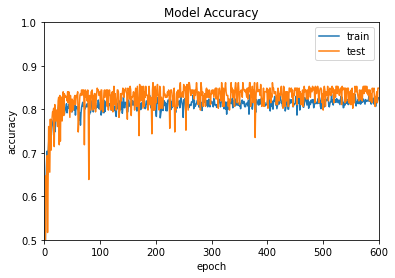

In [32]:
# Displaying model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.axis([0, 600, 0.5, 1])
plt.show()

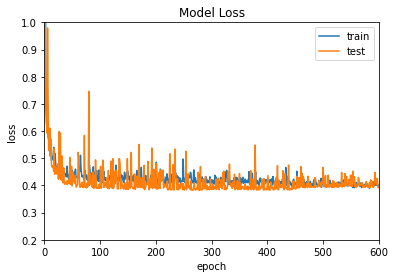

In [33]:
# Displaying model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.axis([0, 600, 0.2, 1])
plt.show()

Some remarks on the model: 
* We get almost 85% accuracy which is pretty decent, but not amazing. 
* After just under 400 epochs accuracy tends to stabilise and we don't see any great improvements.
* Test accuracy is slightly higher than training accuracy which is weird but would tend to not indicate overfitting. 
* Loss stabilises around the same point (400ish epochs) and Test and Train loss is almost exactly the same after around 500 epochs. 

### Case study 

Let's take two patients - one with heart disease and one without - and let's test out what our model predicts for them. 

In [35]:
# Getting the values for our patient without heart disease 
neg_case_study = heart_ds[735:736]
del neg_case_study['target']
print(neg_case_study)
neg_case_study = neg_case_study.values

     age  sex  chest pain type  resting bp s  cholesterol  \
735   66    0                1           150          226   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
735                    0            0             114                0   

     oldpeak  ST slope  
735      2.6         3  


In [36]:
# Predicting the outcome using the NN Sequential model 
predictionn = model.predict(neg_case_study)
predictionn, round(predictionn[0][0])

(array([[0.40560776]], dtype=float32), 0.0)

As we can see above, the model correctly predicts that the patient does not have heart disease.

In [37]:
# Getting the values for our patient without heart disease 
pos_case_study = heart_ds[357:358]
del pos_case_study['target']
print(pos_case_study)
pos_case_study = pos_case_study.values

     age  sex  chest pain type  resting bp s  cholesterol  \
357   46    1                4           115          252   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
357                    0            0             113                1   

     oldpeak  ST slope  
357      1.5         2  


In [38]:
# Predicting the outcome using the NN Sequential model 
predictionp = model.predict(pos_case_study)
predictionp, round(predictionp[0][0])

(array([[0.9009568]], dtype=float32), 1.0)

Again, the model has predicted correctly and determined that this patient has heart disease. 